# Laboratorio #1 TDSIII
## Juan Camilo Chaparro Castellanos | Sebastian Escobar Osorio
## CC 1039466438 | CC 1017231742

In [62]:
#librerias a utilizar
import numpy as np
from matplotlib.pylab import *
#from scipy import *
import scipy.signal as signal
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write #funciones para leer y escribir audio
from IPython.display import Audio # para escuchar la senal
import scipy.signal as sp
from numpy import pad

### 1. Lectura de señales de audio, muestreo establecer numero de datos

* #### Audio #1

In [63]:
audio1=('C4.wav') # Ruta del archivo con la senal
fs1,x1=read(audio1) # Cargar el archivo
t1=np.arange(0, float(len(x1))/fs1, 1.0/fs1) # Vector de tiempo

In [64]:
Audio(x1, rate=fs1) # para escuchar la senal, si se desea

#### En el audio se puede apreciar el sonido de un instrumento de cuerda, siendo el mas grave de los tres

In [65]:
print("frecuencia de muestreo (fs): {} Hz".format(fs1))

frecuencia de muestreo (fs): 22050 Hz


* #### Audio #2

In [66]:
audio2=('D5.wav') # Ruta del archivo con la senal
fs2,x2=read(audio2) # Cargar el archivo
t2=np.arange(0, float(len(x2))/fs2, 1.0/fs2) # Vector de tiempo

In [67]:
Audio(x2, rate=fs2) # para escuchar la senal, si se desea

In [68]:
print("frecuencia de muestreo (fs): {} Hz".format(fs2))

frecuencia de muestreo (fs): 22050 Hz


#### En el audio se puede apreciar el sonido de un instrumento de cuerda donde su rango de sonido respecto a los otros es mucho mas agudo

* #### Audio #3

In [69]:
audio3=('G4.wav') # Ruta del archivo con la senal
fs3,x3=read(audio3) # Cargar el archivo
t3=np.arange(0, float(len(x3))/fs3, 1.0/fs3) # Vector de tiempo

In [70]:
Audio(x3, rate=fs3) # para escuchar la senal, si se desea

In [71]:
print("frecuencia de muestreo (fs): {}Hz".format(fs3))

frecuencia de muestreo (fs): 22050Hz


#### En el audio se puede apreciar el sonido de un instrumento de cuerda, del cual se observa que es un sonido agudo pero no tanto como el anterior

#### Como puede observarse en el anterior paso nos encontramos que aunque los audios suenan diferente todos estan representados con la misma frecuencia de muestreo que es caracterizada por 22050Hz, es decir que se tomaron 22050 muestras por segundo de la señal analoga para generar la señal digital, pero se observa que las señales presentan diferencia en amplitud y se debe a que cada uno genera un sonido mas agudo ó mas grave por lo que se puede inducir que son diferentes instrumentos de cuerda siendo (violonchelo, violin y viola respectivamente)

### 2. Normalizacion y visualizacion de las señales de audio completa y con enventanado de 50ms

#### procedemos a la normalizacion de las señales y generar su respresentacion grafica original para su posterior analisis

In [72]:
x1=x1/float(max(abs(x1))) # normalizacion de la escala la amplitud de la senal
x2=x2/float(max(abs(x2)))  # normalizacion de la escala la amplitud de la senal
x3=x3/float(max(abs(x3)))  # normalizacion de la escala la amplitud de la senal

* #### Audio #1

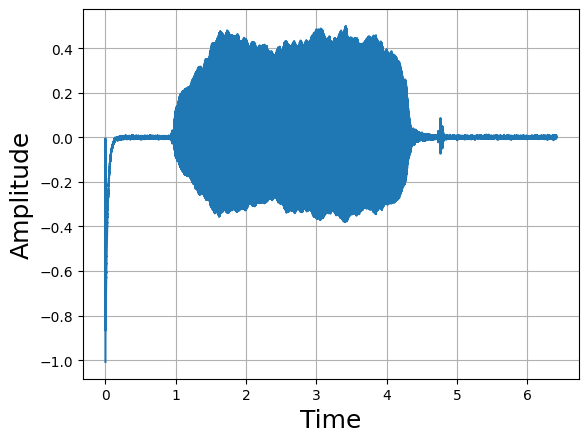

In [73]:
plt.plot(t1,x1) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.grid()
plt.show() # Mostrar la grafica

#### Ahora procedemos a identificar una ventana de 50 milisegundos de la señal #1, para esto tomamos la ventana alrrededor del primer segundo

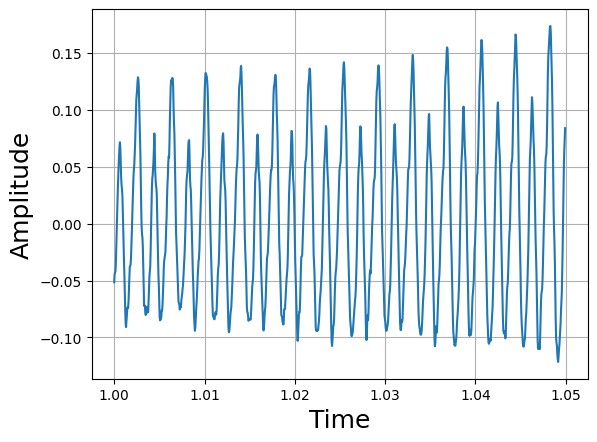

In [74]:
indice_inicio = int(1 * fs1)  # Índice del inicio del segmento
indice_fin = int(1.05 * fs1)  # Índice del final del segmento
segmento1 = x1[indice_inicio:indice_fin]
segmento_guardado = segmento1.copy()

plt.plot(t1[indice_inicio:indice_fin], segmento_guardado)
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.grid()
plt.show()

#### En la ventana se puede observar varias caracterisiticas de la señal: 
    * La señal presenta comportamiento periodico
    * Como puede observar que al ver diferentes cambios de picos en un intervalo de tiempo corto, se infiere que la frecuencia de la señal es alta
    * Se aprecia que la señal no tiene cambios abruptos de amplitud entre 0.2 y -0.2

* #### Audio #2

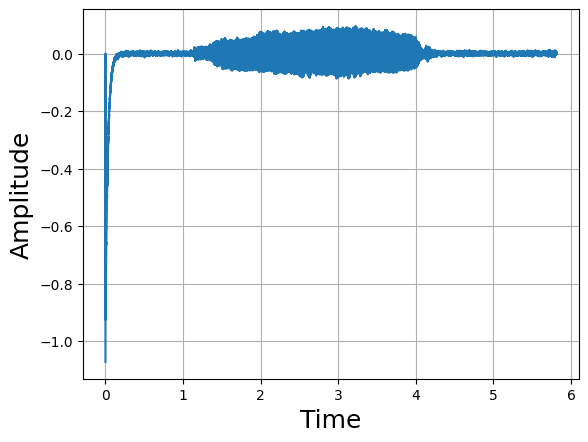

In [75]:
plt.plot(t2,x2) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.grid()
plt.show() # Mostrar la grafica

#### Ahora procedemos a identificar una ventana de 50 milisegundos de la señal #2, para esto tomamos la ventana alrrededor de 1.5 seg

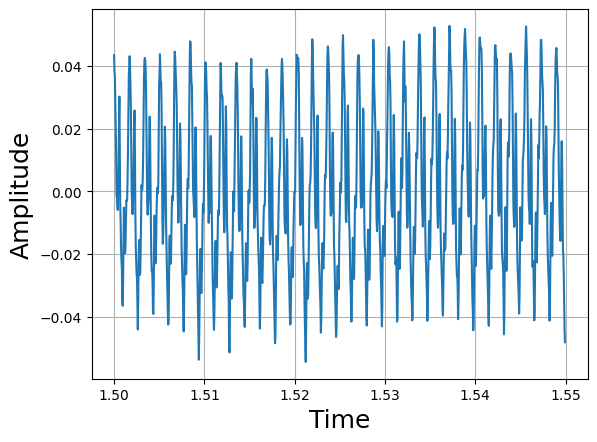

In [76]:
indice_inicio2= int(1.5 * fs2)  # Índice del inicio del segmento
indice_fin2 = int(1.55 * fs2)  # Índice del final del segmento
segmento2 = x2[indice_inicio2:indice_fin2]
segmento_guardado2 = segmento2.copy()

plt.plot(t2[indice_inicio2:indice_fin2], segmento_guardado2)
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.grid()
plt.show()

#### Caracterisiticas de la señal: 
    * Comportamiento periodico
    * frecuencia alta
    * Amplitud constante entre 0.4 y -0.4

* #### Audio #3

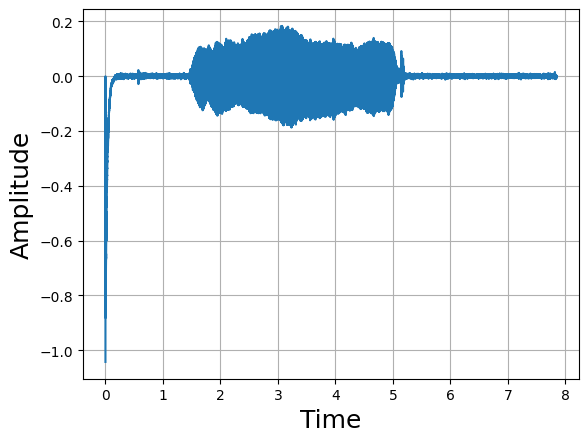

In [77]:
plt.plot(t3,x3) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.grid()
plt.show() # Mostrar la grafica

#### Ahora la ventana de 50 ms

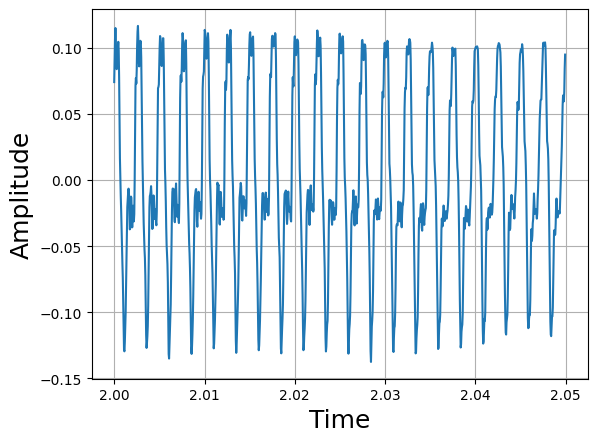

In [78]:
indice_inicio3 = int(2 * fs3)  # Índice del inicio del segmento
indice_fin3 = int(2.05 * fs3)  # Índice del final del segmento
segmento3 = x3[indice_inicio3:indice_fin3]
segmento_guardado3 = segmento3.copy()

plt.plot(t3[indice_inicio3:indice_fin3], segmento_guardado3)
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.grid()
plt.show()

#### Caracterisiticas de la señal: 
    * Comportamiento periodico
    * frecuencia alta
    * Amplitud constante entre 0.15 y -0.15

#### Como puede observarse en las ventanas extraidas de cada una de las señales de audio, se podria decir que las señales presentan un comportamiento estacionario ya que: 
* #### Presenta un patron repetitivo y periodico
* #### No presenta casi varianza en los valores de amplitud
* #### Presentan frecuencia constante

### 3. Enventanado

#### A continuacion se desarrolla una funcion que realiza la segmentacion por enventanado de las señales 

In [122]:

def segmento_senal(senal, fs, L, P, tipo_ventana='rectangular'):
    #senal -> Señal de entrada
    #fs -> Frecuencia de muestreo
    #L -> Longitud de la ventana
    #P -> Traslape entre ventanas
    #Tipo ventana -> rectangular, hann, hamming, blackman, bartlett

    # Inicializar la lista de segmentos
    segmentos = []
    
    # Validar la longitud de la ventana y el traslape
    if L > len(senal) or P >= L:
        raise ValueError("Longitud de ventana o traslape inválidos.")

    # Seleccion de enventanado
    if tipo_ventana == 'rectangular':
        ventana = np.ones(L)
    elif tipo_ventana == 'hann':
        ventana = np.hanning(L)
    elif tipo_ventana == 'hamming':
        ventana = np.hamming(L)
    elif tipo_ventana == 'blackman':
        ventana = np.blackman(L)
    elif tipo_ventana == 'bartlett':
        ventana = np.bartlett(L)
    else:
        raise ValueError("Tipo de ventana no soportado.")

    # imprimir segmentos
    for i in range(0, len(senal) - L + 1, P):
        segmento = senal[i:i+L] * ventana
        segmentos.append(segmento)

    return segmentos

#### Procedemos a generar el ejercicio de segmentacion a cada uno de los segmentos de señal, para mayor practicidad se utiliza diferente tipo de enventanado en ellas

* #### Señal #1

In [123]:
Fs=22050
L=50
P=10
t = np.arange(0, 1, 1/Fs)  # Vector de tiempo

segmentos = segmento_senal(segmento_guardado,Fs,L,P,tipo_ventana='hamming')


In [81]:
len(segmentos)

106

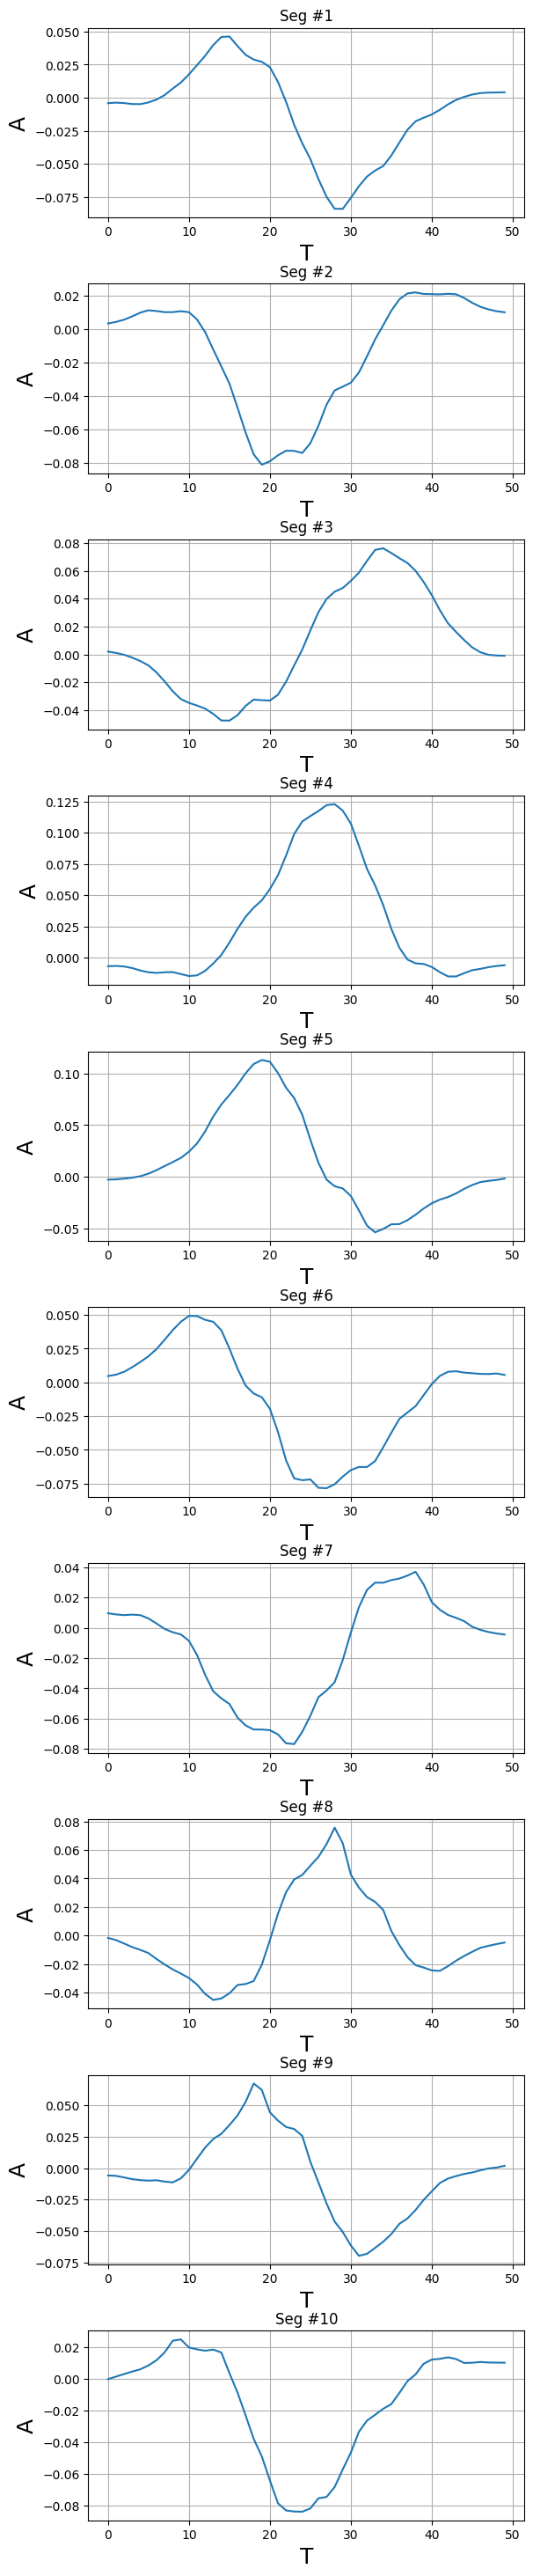

In [82]:
# Visualizar los primeros 10 segmentos
for i in range(10):
    plt.subplot(10, 1, i+1)
    plt.plot(segmentos[i])
    plt.title(f"Seg #{i+1}")
    plt.xlabel('T',fontsize=18) # Etiqueta eje X
    plt.ylabel('A',fontsize=18) # Etiqueta eje Y
    plt.grid()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=6, wspace=0.2, hspace=0.35) # separacion entre subplots
plt.show()

In [83]:
#### Analisis del resultado

* #### Señal #2

In [84]:
Fs=22050
L2=50
P2=20
t2 = np.arange(0, 1, 1/Fs)  # Vector de tiempo

segmentos2 = segmento_senal(segmento_guardado2,Fs,L2,P2,tipo_ventana='rectangular')


In [85]:
len(segmentos2)

53

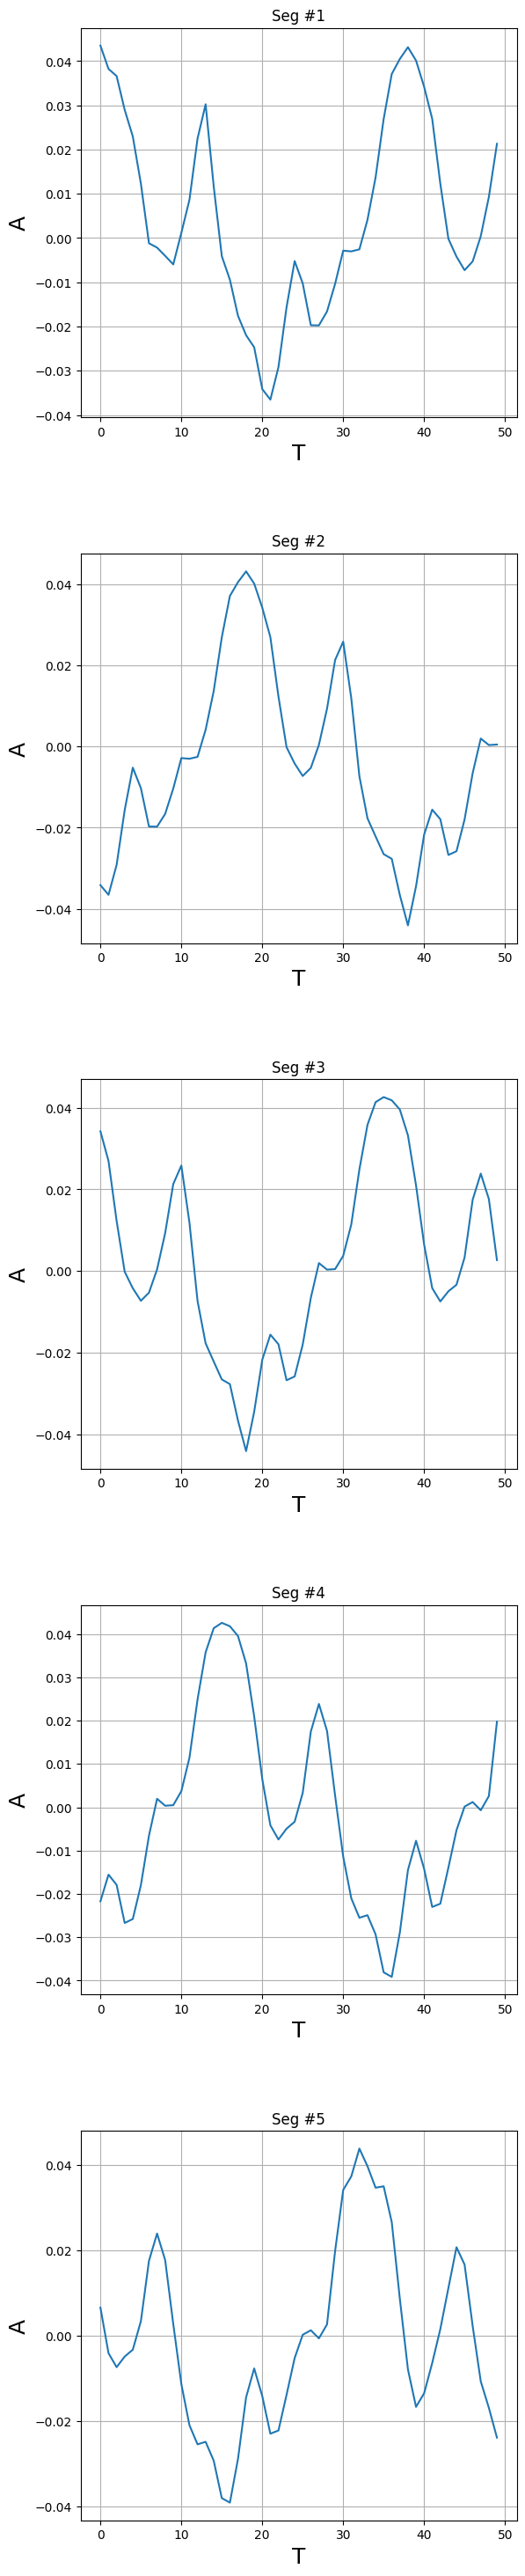

In [86]:
# Visualizar los primeros 5 segmentos
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.plot(segmentos2[i])
    plt.title(f"Seg #{i+1}")
    plt.xlabel('T',fontsize=18) # Etiqueta eje X
    plt.ylabel('A',fontsize=18) # Etiqueta eje Y
    plt.grid()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=6, wspace=0.2, hspace=0.35) # separacion entre subplots
plt.show()

In [87]:
#### Analsis del resultado

#### * Señal #3

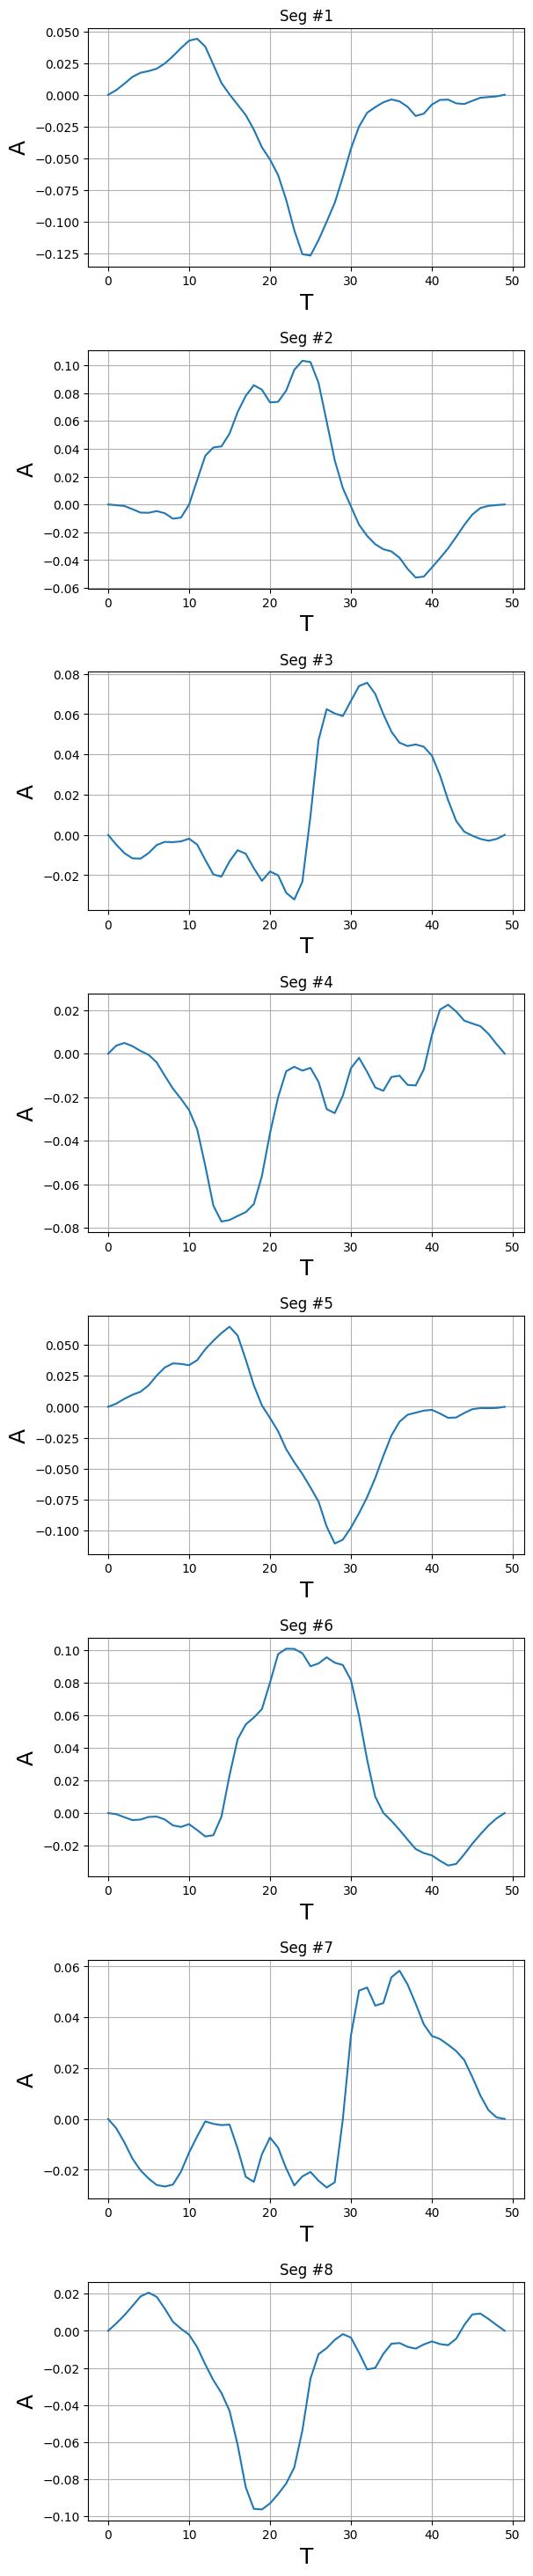

In [88]:
Fs=22050
L3=50
P3=40
t3 = np.arange(0, 1, 1/Fs)  # Vector de tiempo

segmentos3 = segmento_senal(segmento_guardado3,Fs,L3,P3,tipo_ventana='bartlett')

len(segmentos2)

# Visualizar los primeros 8 segmentos
for i in range(8):
    plt.subplot(8, 1, i+1)
    plt.plot(segmentos3[i])
    plt.title(f"Seg #{i+1}")
    plt.xlabel('T',fontsize=18) # Etiqueta eje X
    plt.ylabel('A',fontsize=18) # Etiqueta eje Y
    plt.grid()   
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=6, wspace=0.2, hspace=0.35) # separacion entre subplots
plt.show()

#### Analisis final de la segmentacion de todas las señales

se puede observar que los segmentos muestran un comportamiento periódico, lo cual es consistente con la naturaleza de las señales de audio. Esto sugiere que la señal tiene componentes armónicas que se repiten dentro de cada segmento. la ventana aplicada ha sido efectiva para reducir los efectos de borde, lo que indica que la ventana utilizada ha mitigado los efectos no deseados que pueden ocurrir en los bordes de los segmentos. La frecuencia parece mantenerse relativamente constante, lo que sugiere que la señal puede tener una tonalidad estable.

### 4. Reconstruccion de la señal por medio del enventanado

#### Se crea la funcion de construccion de la señales

In [96]:
import numpy as np

def reconstruir_senal(segmentos, P):
    """
    Reconstruye una señal a partir de segmentos enventanados.
    
    Parámetros:
    segmentos (np.array): Array de segmentos de la señal.
    P (int): Tamaño del solapamiento entre segmentos.
    
    Retorna:
    np.array: Señal reconstruida.
    """
    
    # Asegurarse que 'segmentos' sea un array de NumPy
    segmentos = np.array(segmentos)
    
    # Longitud de un segmento
    L = segmentos.shape[1]
    
    # Validación del solapamiento
    if P >= L:
        raise ValueError("El solapamiento P debe ser menor que la longitud del segmento L")
    
    # Inicializar el array para la señal reconstruida con ceros
    senal_reconstruida = np.zeros(L + (segmentos.shape[0] - 1) * P)
    contador = np.zeros_like(senal_reconstruida)
    
    # Suma de segmentos con control de solapamiento
    for i in range(segmentos.shape[0]):
        senal_reconstruida[i * P:i * P + L] += segmentos[i]
        contador[i * P:i * P + L] += 1
    
    # Normalizar por el número de sumas en cada punto
    senal_reconstruida = senal_reconstruida / contador
    
    return senal_reconstruida


#### Ahora procedemos a utilizar la funcion para reconstruir cada uno de los segmentos de las diferentes señales

* #### Señal #1

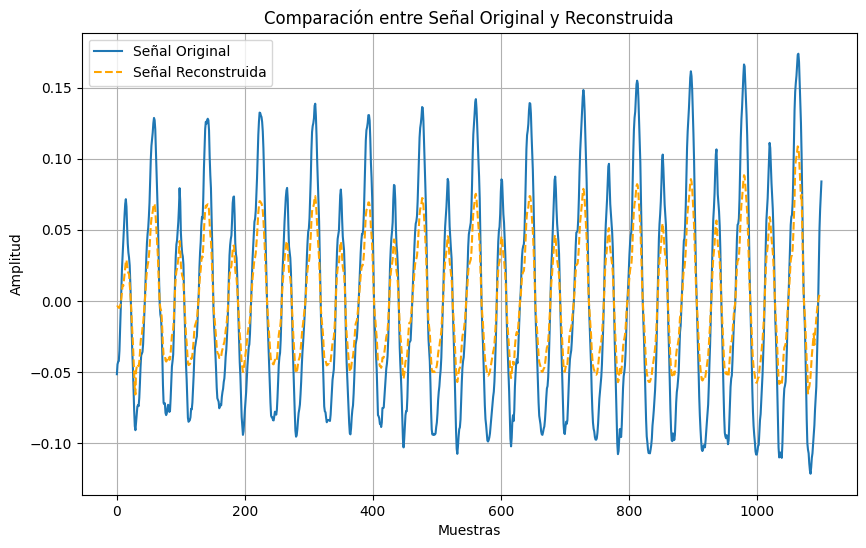

In [119]:

# Reconstruir la señal
senal_reconstruida = reconstruir_senal(segmentos, P)

# Visualizar la señal original y la reconstruida
plt.figure(figsize=(10, 6))
plt.plot(segmento_guardado, label='Señal Original')
plt.plot(senal_reconstruida, '--',  color='orange', label='Señal Reconstruida')  # Puntos rojos
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Comparación entre Señal Original y Reconstruida')
plt.grid(True)
plt.show()

In [98]:
#### analisis de la comparacion la reconstruccion vs original

* #### Señal #2

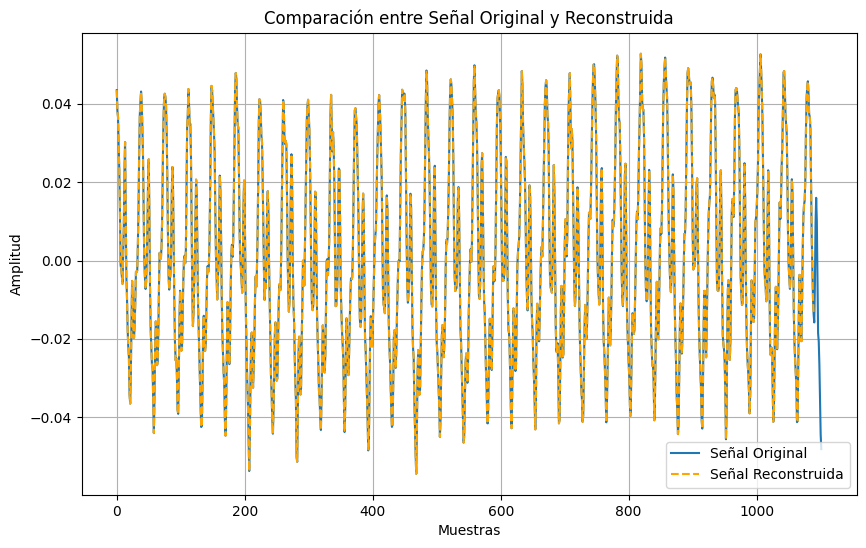

In [118]:
# Reconstruir la señal
senal_reconstruida2 = reconstruir_senal(segmentos2, P2)

# Visualizar la señal original y la reconstruida
plt.figure(figsize=(10, 6))
plt.plot(segmento_guardado2, label='Señal Original')
plt.plot(senal_reconstruida2, '--',  color='orange', label='Señal Reconstruida') 
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Comparación entre Señal Original y Reconstruida')
plt.grid(True)
plt.show()

In [100]:
#### analisis comparacion

* #### Señal #3

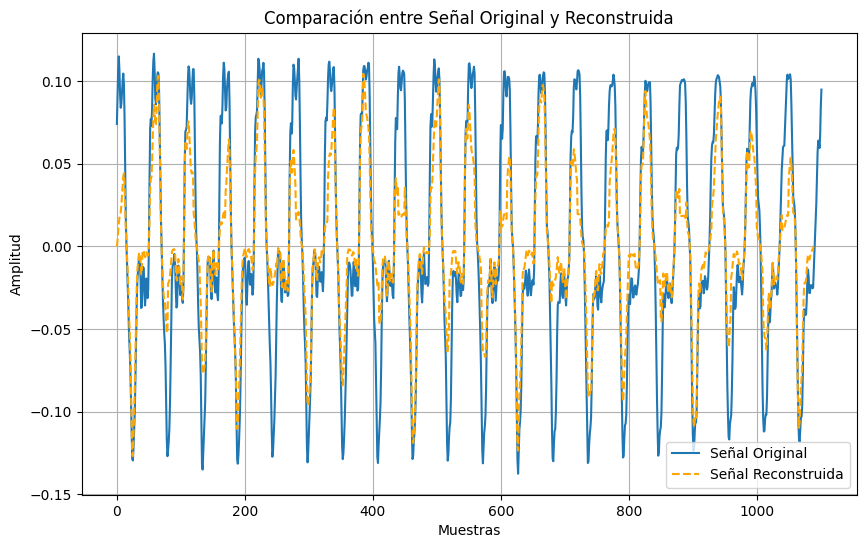

In [120]:
# Reconstruir la señal
senal_reconstruida3 = reconstruir_senal(segmentos3, P3)

# Visualizar la señal original y la reconstruida
plt.figure(figsize=(10, 6))
plt.plot(segmento_guardado3, label='Señal Original')
plt.plot(senal_reconstruida3, '--',  color='orange', label='Señal Reconstruida') 

plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Comparación entre Señal Original y Reconstruida')
plt.grid(True)
plt.show()

In [61]:
#### Analisis de comparacion

### 5. Analisis por Coeficiente de correlacion

#### Para evaluar los resultados obtenidos nos apoyamos en el coeficiente de correlacion para generar una comparacion mas exacta 

* #### Rxx Señal #1

In [51]:
long_max1 = max(segmento_guardado.shape[0], senal_reconstruida.shape[0])
segmento_guardado = pad(segmento_guardado, (0, long_max1 - segmento_guardado.shape[0]), 'constant')
senal_reconstruida = pad(senal_reconstruida, (0, long_max1 - senal_reconstruida.shape[0]), 'constant')

In [52]:
# coeficiente de correlación
correlacion = np.corrcoef(segmento_guardado, senal_reconstruida)[0, 1]
print("Coeficiente de correlación:", correlacion)

Coeficiente de correlación: 0.989459599014708


#### * Rxx Señal #2

In [53]:
long_max2 = max(segmento_guardado2.shape[0], senal_reconstruida2.shape[0])
segmento_guardado2 = pad(segmento_guardado2, (0, long_max2 - segmento_guardado2.shape[0]), 'constant')
senal_reconstruida2 = pad(senal_reconstruida2, (0, long_max2 - senal_reconstruida2.shape[0]), 'constant')

# coeficiente de correlación
correlacion2 = np.corrcoef(segmento_guardado2, senal_reconstruida2)[0, 1]
print("Coeficiente de correlación:", correlacion2)

Coeficiente de correlación: 0.9689857940380529


* #### Rxx Señal #3

In [54]:
long_max3 = max(segmento_guardado3.shape[0], senal_reconstruida3.shape[0])
segmento_guardado3 = pad(segmento_guardado3, (0, long_max3 - segmento_guardado3.shape[0]), 'constant')
senal_reconstruida3 = pad(senal_reconstruida3, (0, long_max3 - senal_reconstruida3.shape[0]), 'constant')

# coeficiente de correlación
correlacion3 = np.corrcoef(segmento_guardado3, senal_reconstruida3)[0, 1]
print("Coeficiente de correlación:", correlacion3)

Coeficiente de correlación: 0.9398521957873153


In [125]:
#### Analisis general de los coeficientes

## Conlusiones

- Se observa cómo diferentes ventanas afectan la calidad de la reconstrucción. Ventanas más suaves (como Hann) suelen reducir los efectos de borde, pero pueden atenuar componentes de alta frecuencia.
- Las ventanas más cortas ofrecen mejor resolución temporal pero peor resolución en frecuencia, y viceversa. Esto implica un compromiso entre la capacidad de localizar eventos transitorios y la precisión en la estimación de frecuencias.
- Un mayor traslape reduce los efectos de borde y produce una reconstrucción más suave e implica un mayor número de operaciones.
- los resultados de la correlación para las tres señales indica que que la reconstrucción se hizo exitosamente como se puede ver visualmente en las graficas y ademas los coeficientes de correlación son muy cercanos a 1, indicando su similitud con la señal.